First of all let's import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

Let's take a look at the dataset

In [2]:
#loading the dataset as pokemon_df
pokemon_df = pd.read_csv('pokemonGO.csv')

#taking a look at the first 10 rows
pokemon_df.head(n=10)

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
0,1,Bulbasaur,Grass,Poison,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,4,Charmander,Fire,NaN,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,5,Charmeleon,Fire,NaN,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...
5,6,Charizard,Fire,Flying,2620,135,http://cdn.bulbagarden.net/upload/thumb/7/7e/0...
6,7,Squirtle,Water,NaN,1015,81,http://cdn.bulbagarden.net/upload/thumb/3/39/0...
7,8,Wartortle,Water,NaN,1594,105,http://cdn.bulbagarden.net/upload/thumb/0/0c/0...
8,9,Blastoise,Water,NaN,2560,137,http://cdn.bulbagarden.net/upload/thumb/0/02/0...
9,10,Caterpie,Bug,NaN,446,83,http://cdn.bulbagarden.net/upload/thumb/5/5d/0...


What are the different types of pokemon?

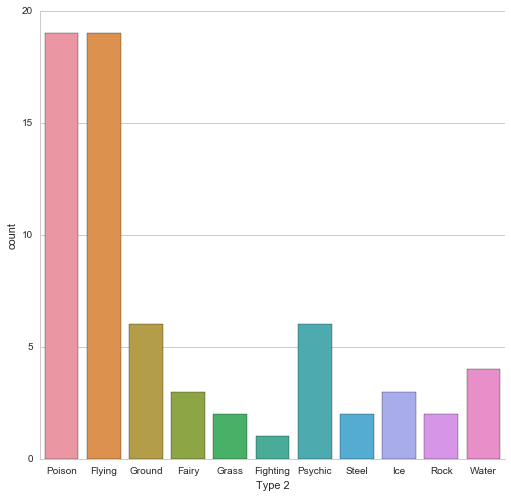

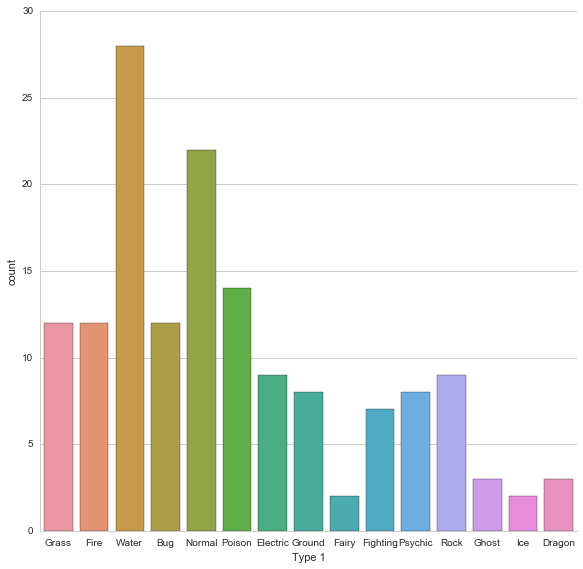

In [3]:
sns.factorplot('Type 2',data=pokemon_df,kind='count',size=7)
sns.factorplot('Type 1',data=pokemon_df,kind='count',size=(8))

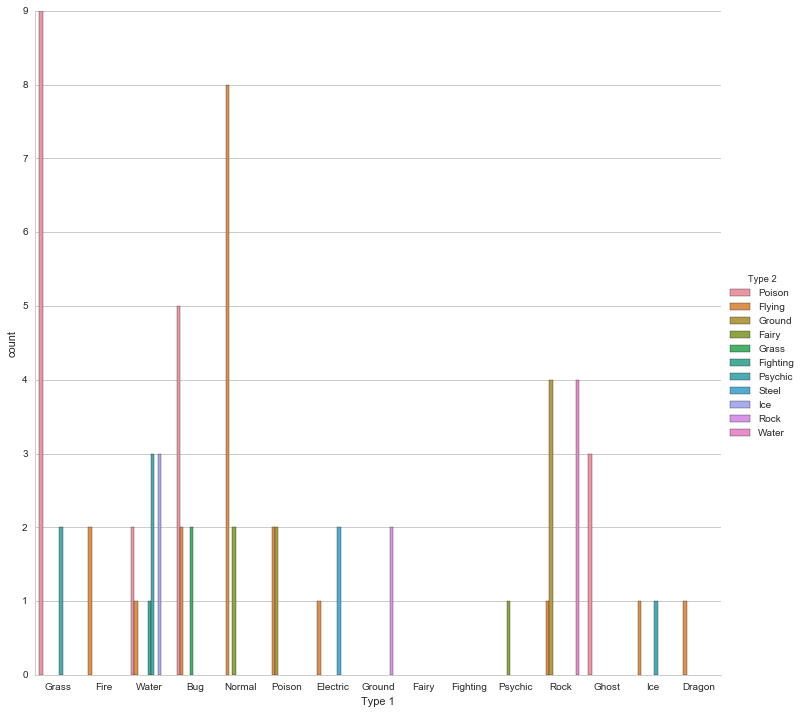

In [4]:
sns.factorplot('Type 1', data=pokemon_df, kind='count', hue='Type 2', size=10)

As you can see Fairy and Fighting type pokemons don't have a second type, and most of water type pokemons have a second type.

How many pokemons are there (single-type, double-type)?

In [5]:
pokemon_df[['Type 1','Type 2']].count()

Type 1    151
Type 2     67
dtype: int64

As you can see we have in total 151 pokemons, 67 of which have two types of abilities, which leaves 84 of them being single-type pokemons.

Now let's take a look at battle performances

1. Who has the highest Combat Power (CP)?
2. Who has the lowest Combat Power (CP)?
3. Who has the highest Hit Points (HP)?
4. Who has the lowest Hit Points (HP)?
5. Who is the strongest Pokemon?

In [6]:
#Question 1
pokemon_df[pokemon_df['Max CP'] == pokemon_df['Max CP'].max()]

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
149,150,Mewtwo,Psychic,NaN,4174,180,http://cdn.bulbagarden.net/upload/thumb/7/78/1...


As we could've expected Mewtwo is the pokemon with the highest Combat Power in our dataset.

In [7]:
#Question 2
pokemon_df[pokemon_df['Max CP'] == pokemon_df['Max CP'].min()]

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
128,129,Magikarp,Water,NaN,264,43,http://cdn.bulbagarden.net/upload/thumb/0/02/1...


Magikarp turns out to be the pokemon with the lowest CP. However when it evolves into Gyarados, I can guarantee that he's among the strongest.

In [8]:
#Question 3
pokemon_df[pokemon_df['Max HP'] == pokemon_df['Max HP'].max()]

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
112,113,Chansey,Normal,NaN,679,408,http://cdn.bulbagarden.net/upload/thumb/c/cd/1...


No wonder Chansey has the highest HP. This pokemon is just not suited for battle since it is known to be a medical assistant.

In [9]:
#Question 4
pokemon_df[pokemon_df['Max HP'] == pokemon_df['Max HP'].min()]

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
49,50,Diglett,Ground,NaN,460,27,http://cdn.bulbagarden.net/upload/thumb/3/31/0...


Rather surprising. What caused diglett to have the lowest HP? Is it due to the fact that it's a ground type pokemon?
Usually ground type pokemons/monsters/characters are known to be tough.

Let's dig a little deeper to study this possibility!

In [10]:
#First off, what is the mean HP value?
mean_hp = pokemon_df['Max HP'].mean()
mean_hp

113.35099337748345

Let's crop the dataframe into two other dataframes, one for pokemons whose first type is ground and then for those whose second type is ground

In [11]:
first_type_ground_df = pokemon_df[pokemon_df['Type 1'] == 'Ground']

second_type_ground_df = pokemon_df[pokemon_df['Type 2'] == 'Ground']

In [12]:
first_type_ground_df.count()

Pokemon No.    8
Name           8
Type 1         8
Type 2         2
Max CP         8
Max HP         8
Image URL      8
dtype: int64

In [13]:
second_type_ground_df.count()

Pokemon No.    6
Name           6
Type 1         6
Type 2         6
Max CP         6
Max HP         6
Image URL      6
dtype: int64

In [14]:
#the dataframe aren't don't have so many rows, so we can take a complete look at their content
first_type_ground_df

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
26,27,Sandshrew,Ground,NaN,804,91,http://cdn.bulbagarden.net/upload/thumb/9/9e/0...
27,28,Sandslash,Ground,NaN,1823,130,http://cdn.bulbagarden.net/upload/thumb/0/0b/0...
49,50,Diglett,Ground,NaN,460,27,http://cdn.bulbagarden.net/upload/thumb/3/31/0...
50,51,Dugtrio,Ground,NaN,1176,67,http://cdn.bulbagarden.net/upload/thumb/e/e5/0...
103,104,Cubone,Ground,NaN,1013,91,http://cdn.bulbagarden.net/upload/thumb/2/2a/1...
104,105,Marowak,Ground,NaN,1668,107,http://cdn.bulbagarden.net/upload/thumb/9/98/1...
110,111,Rhyhorn,Ground,Rock,1190,138,http://cdn.bulbagarden.net/upload/thumb/9/9b/1...
111,112,Rhydon,Ground,Rock,2259,178,http://cdn.bulbagarden.net/upload/thumb/4/47/1...


In [15]:
second_type_ground_df

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
30,31,Nidoqueen,Poison,Ground,2502,154,http://cdn.bulbagarden.net/upload/thumb/b/bf/0...
33,34,Nidoking,Poison,Ground,2492,140,http://cdn.bulbagarden.net/upload/thumb/c/c6/0...
73,74,Geodude,Rock,Ground,855,75,http://cdn.bulbagarden.net/upload/thumb/9/98/0...
74,75,Graveler,Rock,Ground,1443,99,http://cdn.bulbagarden.net/upload/thumb/7/75/0...
75,76,Golem,Rock,Ground,2319,138,http://cdn.bulbagarden.net/upload/thumb/f/f2/0...
94,95,Onix,Rock,Ground,863,67,http://cdn.bulbagarden.net/upload/thumb/9/9a/0...


Let's make two visualizations of both dataframes

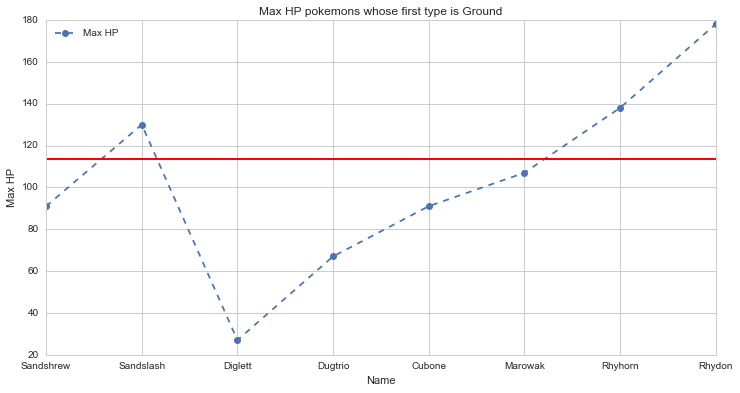

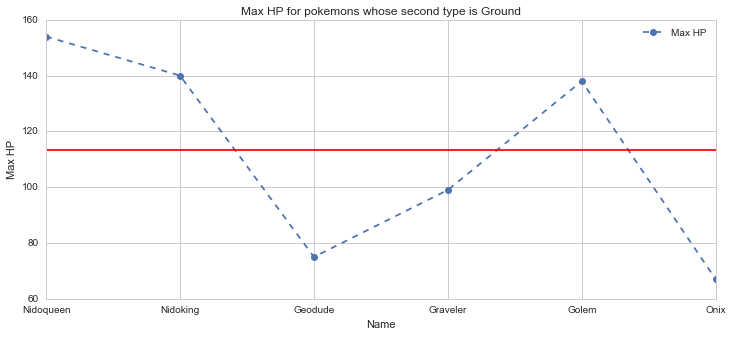

In [16]:
#first dataframe
first_type_ground_df.plot(x='Name',y='Max HP',marker='o',figsize=(12,6),linestyle='--')
#setting the title of the dataframe
plt.title('Max HP pokemons whose first type is Ground')
#setting the y axis label
plt.ylabel('Max HP')
plt.axhline(mean_hp,color='red',linewidth=2)

second_type_ground_df.plot(x='Name', y='Max HP', marker='o',figsize=(12,5),linestyle='--')
#setting the title of the dataframe
plt.title('Max HP for pokemons whose second type is Ground')
#setting the y axis label
plt.ylabel('Max HP')
plt.axhline(mean_hp,color='red')

As you can see only 3 pokemons whose first type is ground have a Max HP higher than the average.

As to double-type pokemons whose second type is Ground, we have an even distribution. 3 pokemons are above average and 3 pokemons are below average.

Overall we have 8 ground type pokemons whose Max HP is below average and 6 whose Max HP is above average. The difference is very small, therefore we can only conclude that being a ground type pokemon gives you a chance to have a low Max HP. 

Now to answer the fifth and last question, let's think of what it actually means to be the strongest pokemon.
Being the strongest pokemon means having a CP that is above average but also a HP that is below average.
Let's gather all pokemons whose CP and HP follow this logic.

In [17]:
#finding the mean CP
mean_cp = pokemon_df['Max CP'].mean()
mean_cp

1637.291390728477

In [18]:
#creating a dataframe containing the strongest pokemons
strong_pokemon_df = pokemon_df[pokemon_df['Max CP'] >= mean_cp]
strong_pokemon_df = strong_pokemon_df[strong_pokemon_df['Max HP'] <= mean_hp]

In [19]:
strong_pokemon_df

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
1,2,Ivysaur,Grass,Poison,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
23,24,Arbok,Poison,NaN,1779,107,http://cdn.bulbagarden.net/upload/thumb/c/cd/0...
25,26,Raichu,Electric,NaN,2042,107,http://cdn.bulbagarden.net/upload/thumb/8/88/0...
43,44,Gloom,Grass,Poison,1701,107,http://cdn.bulbagarden.net/upload/thumb/2/2a/0...
46,47,Parasect,Bug,Grass,1759,107,http://cdn.bulbagarden.net/upload/thumb/8/80/0...
64,65,Alakazam,Psychic,NaN,1826,99,http://cdn.bulbagarden.net/upload/thumb/c/cc/0...
81,82,Magneton,Electric,Steel,1893,91,http://cdn.bulbagarden.net/upload/thumb/7/72/0...
84,85,Dodrio,Normal,Flying,1849,107,http://cdn.bulbagarden.net/upload/thumb/9/93/0...
90,91,Cloyster,Water,Ice,2067,91,http://cdn.bulbagarden.net/upload/thumb/1/1d/0...
93,94,Gengar,Ghost,Poison,2093,107,http://cdn.bulbagarden.net/upload/thumb/c/c6/0...


In [20]:
strong_pokemon_df.count()

Pokemon No.    17
Name           17
Type 1         17
Type 2          9
Max CP         17
Max HP         17
Image URL      17
dtype: int64

We have in total 17 pokemons that can compete for the strongest pokemon title. Now let's repeat the same process again in order to increase competitivity.

In [21]:
mean_hp2 = strong_pokemon_df['Max HP'].mean()
mean_cp2 = strong_pokemon_df['Max CP'].mean()

In [22]:
strong_pokemon_df = strong_pokemon_df[strong_pokemon_df['Max CP'] >= mean_cp2]
strong_pokemon_df = strong_pokemon_df[strong_pokemon_df['Max HP'] <= mean_hp2]

In [23]:
#Let's take a look at the new dataframe
strong_pokemon_df

,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
81,82,Magneton,Electric,Steel,1893,91,http://cdn.bulbagarden.net/upload/thumb/7/72/0...
90,91,Cloyster,Water,Ice,2067,91,http://cdn.bulbagarden.net/upload/thumb/1/1d/0...


We've finally reached the end of our research and as I personally did not expect, Cloyster with a CP of 2067 and a HP of 91 is the strongest pokemon on this dataset, again based on my criteria.